In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv("Fraud.csv")
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Understand the dataset

In [3]:
dt.shape

(6362620, 11)

In [4]:
dt.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


##  Checking for missing values

In [6]:
dt.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

So above we can see that there are no missing values in dataframe.

## Deleting Column that we are not going to use for further process

In [7]:
dt["step"].value_counts().sort_index()

1      2708
2      1014
3       552
4       565
5       665
       ... 
739      10
740       6
741      22
742      14
743       8
Name: step, Length: 743, dtype: int64

In [8]:
dt = dt.drop(["nameOrig","nameDest"],axis=1)
dt.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


## Data encoding 

<AxesSubplot:>

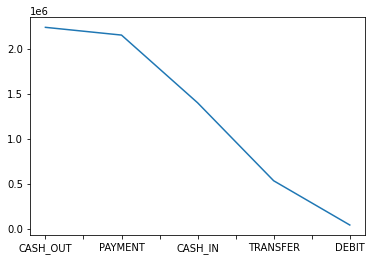

In [9]:
dt["type"].value_counts().plot()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt["type"] = le.fit_transform(dt["type"])
dt.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [11]:
dict(zip(le.classes_,le.fit_transform(le.classes_)))

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

## Handling the outliers

In [12]:
dt["amount"].quantile(0.99)

1615979.4715999917

In [13]:
dt["amount"].quantile(0.1)

4501.3

In [14]:
dt["amount"].quantile(0.50)

74871.94

In [15]:
dt["amount"].quantile(0.95)

518634.19649999996

**so above we can see that "95% quantile" and "99% quantile" have big difference that's why we can assume that there are some outliers inside the dataset.**

we are going to remove outliers using the z-score method.

## Z-score method

In [16]:
dt["Z-score"] = (dt["amount"] - dt["amount"].mean())/ dt["amount"].std() 
dt.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Z-score
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,-0.281560
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,-0.294767
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,-0.297555
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,-0.297555
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,-0.278532


In [17]:
dt = dt[(dt["Z-score"] < 3) & (dt["Z-score"] > -3 )]
dt.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Z-score
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,-0.281560
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,-0.294767
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,-0.297555
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,-0.297555
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,-0.278532


In [18]:
dt.shape

(6317675, 10)

In [19]:
dt = dt.drop("Z-score",axis=1)
dt.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


So before the total number of records are **"6362620"** and after removing the outlier the current number or records are **"6317675"**.

Total Outlier removed = **44945**

## Multi-collinearity Problem

<AxesSubplot:>

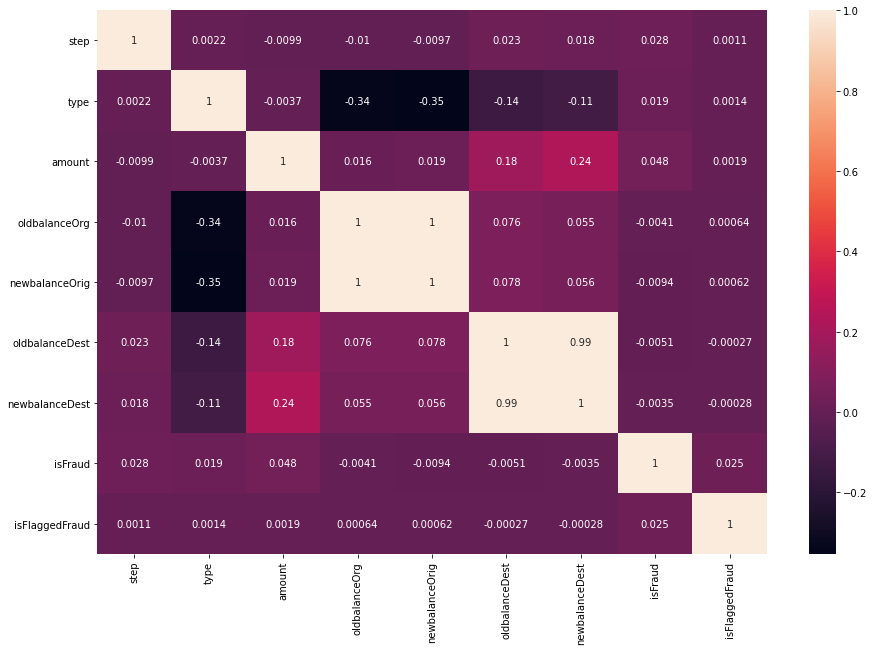

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(),annot=True)

So there are two Multi-collinearity we can find

1. oldbalanceOrg | newbalanceOrig


2. oldbalanceDest | newbalanceDest

So because of they are highly correlated to eachother we have to remove one of them from each connection.

In [21]:
dt = dt.drop(["newbalanceOrig","newbalanceDest"],axis=1)
dt.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,0.0,0,0
1,1,3,1864.28,21249.0,0.0,0,0
2,1,4,181.00,181.0,0.0,1,0
3,1,1,181.00,181.0,21182.0,1,0
4,1,3,11668.14,41554.0,0.0,0,0


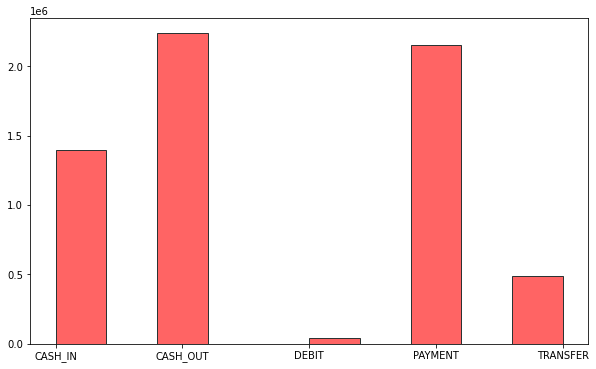

In [22]:
plt.figure(figsize=(10,6))
xyz = ['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']
plt.hist(dt["type"],histtype='bar',color="#FF6464",edgecolor="#2C3333")
plt.xticks([0,1,2,3,4],xyz)
plt.show()

In [23]:
dt[(dt["type"] == 3) & (dt["isFraud"] == 1)]

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud


 0 values when **type = Payment** and **isFraud = True**

In [24]:
dt[(dt["type"] == 3) & (dt["isFlaggedFraud"] == 1)]

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud


 0 values when **type = Payment** and **isFlaggedFraud = True**

So we can see that whenever the **type** = **Payment** there are no chances of **Fraud**.

that's why we are going to delete all the data where **type** = **3** (Type = PAYMENT)

In [25]:
dt = dt[dt["type"] != 3]
dt.shape

(4166180, 7)

In [26]:
dt.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,4,181.00,181.0,0.0,1,0
3,1,1,181.00,181.0,21182.0,1,0
9,1,2,5337.77,41720.0,41898.0,0,0
10,1,2,9644.94,4465.0,10845.0,0,0
15,1,1,229133.94,15325.0,5083.0,0,0


In [27]:
dt["type"].value_counts()

1    2236639
0    1399284
4     488825
2      41432
Name: type, dtype: int64

In [28]:
dt = dt.reset_index(drop=True)
dt.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,181.00,181.0,0.0,1,0
1,1,1,181.00,181.0,21182.0,1,0
2,1,2,5337.77,41720.0,41898.0,0,0
3,1,2,9644.94,4465.0,10845.0,0,0
4,1,1,229133.94,15325.0,5083.0,0,0


# Splitting columns into feature columns and output column

In [29]:
x = dt.drop("isFraud",axis=1).values
x[0:5]

array([[1.0000000e+00, 4.0000000e+00, 1.8100000e+02, 1.8100000e+02,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.8100000e+02, 1.8100000e+02,
        2.1182000e+04, 0.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 5.3377700e+03, 4.1720000e+04,
        4.1898000e+04, 0.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 9.6449400e+03, 4.4650000e+03,
        1.0845000e+04, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 2.2913394e+05, 1.5325000e+04,
        5.0830000e+03, 0.0000000e+00]])

In [30]:
y = dt["isFraud"].values
y = y.reshape(-1,1)
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

#  Splitting data into training set and test set for cross validation

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
x_train.shape

(2916326, 6)

In [32]:
x_test.shape

(1249854, 6)

In [33]:
y_train.shape

(2916326, 1)

In [34]:
y_test.shape

(1249854, 1)

# Check if data is linear separatable or not

In [46]:
dt.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,181.00,181.0,0.0,1,0
1,1,1,181.00,181.0,21182.0,1,0
2,1,2,5337.77,41720.0,41898.0,0,0
3,1,2,9644.94,4465.0,10845.0,0,0
4,1,1,229133.94,15325.0,5083.0,0,0


In [49]:
d1 = dt[dt["isFraud"] == 1]
d2 = dt[dt["isFraud"] == 0]

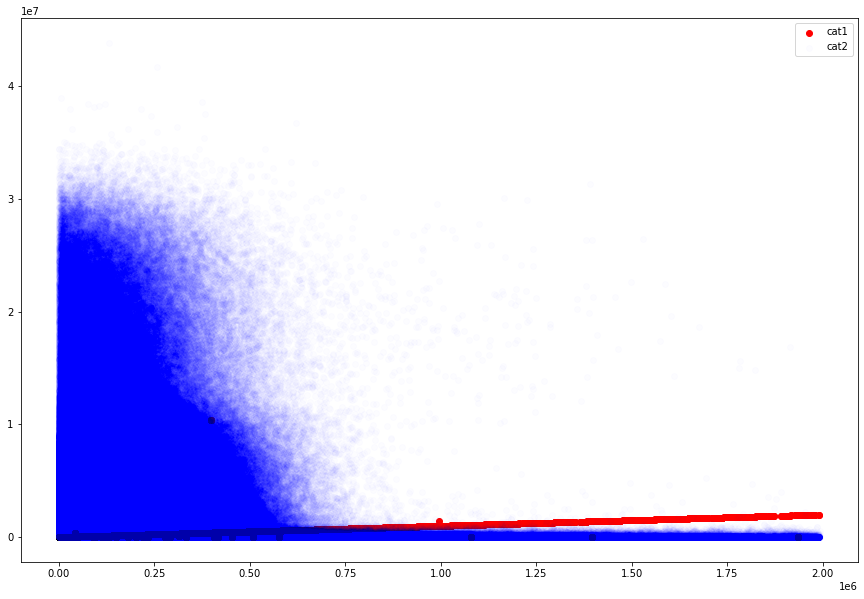

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(d1["amount"],d1["oldbalanceOrg"],c="r")
plt.scatter(d2["amount"],d2["oldbalanceOrg"],c="b")
plt.legend(["cat1","cat2"])
plt.show()

so above we can see that the data is not-linear separatable Thats why we can use models like **kernel SVM**,**random forest**,**Decision trees**.

# Fitting data into classification model 

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
rf = RandomForestClassifier(min_samples_split=2)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

<ipython-input-60-80d600236c0e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.999311919632213


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1247816,     105],
       [    755,    1178]], dtype=int64)

In [63]:
rf.predict([[1,4,181.00,181.0,0.0,0]])

array([1], dtype=int64)

In [64]:
rf.predict([[1,2,5337.77,41720.0,41898.0,0]])

array([0], dtype=int64)

In [68]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(10)
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,x,y,cv=kfold)

E:\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was

In [71]:
print(score.mean())

0.8937379085877231
